TODO

Year:1990-2020
depth:0
Region: 14 (P1,P2....)

1. GLODAP salinity

2. Model salinity

3. Plot DIC vs. SAL / TA vs. SAL, separate region

In [2]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'monospace',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

    - Region

Text(0.5, 0.98, 'colours assigned')

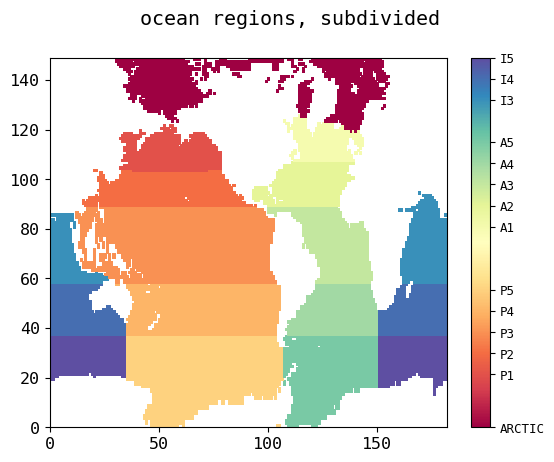

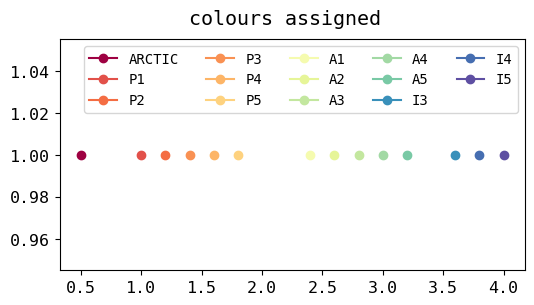

In [3]:
regs = ['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

regdict = {'ARCTIC' : {'number' : 0.5},
           'P1' : {'number': 1.0},
          'P2' : {'number': 1.2},
           'P3' : {'number': 1.4},
           'P4' : {'number': 1.6},
           'P5' : {'number': 1.8},
            'A1' : {'number': 2.4},
          'A2' : {'number': 2.6},
           'A3' : {'number': 2.8},
           'A4' : {'number': 3},
           'A5' : {'number': 3.2},
           'I3' : {'number': 3.6},
           'I4' : {'number': 3.8},
           'I5' : {'number': 4},
           
          }

tics = []
tcm = 'Spectral'


tmask = nc.Dataset('/gpfs/data/greenocean/software/resources/breakdown/clq_basin_masks_ORCA.nc')

maskno = np.zeros([149,182])
for i in range(0, len(regs)):
    maskno[tmask[regs[i]][:] == 1] = regdict[regs[i]]['number']
    tics.append(regdict[regs[i]]['number'])
maskno[maskno == 0] = np.nan

w = plt.pcolor(maskno, cmap = tcm, vmin = 0.5, vmax = 4)
cbar = plt.colorbar(w, ticks=tics)
t = cbar.ax.set_yticklabels(['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5'], fontsize = 9)
plt.suptitle('ocean regions, subdivided')

fact = 0.2
fig = plt.figure(figsize=(30*fact,15*fact))
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')
norm = matplotlib.colors.Normalize(vmin=0.5, vmax=4)
for i in range(0,len(regs)):
    rgba = cmap(norm(regdict[regs[i]]['number']))
    plt.plot(regdict[regs[i]]['number'], 1, marker = 'o', color = rgba, label = regs[i])
    regdict[regs[i]]['colour'] = rgba
plt.legend(ncol = 5, fontsize = 10)
plt.suptitle('colours assigned')


In [4]:
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')
norm = matplotlib.colors.Normalize(vmin=0.5, vmax=4)

# GLODAP

In [5]:
df = pd.read_csv('/gpfs/home/mep22dku/scratch/SOZONE/evalOutput/datasets/GLODAPv2.2022_GLOBAL_valid_DICTA_umolL_STITCHED.csv')
df = df[(df.YR > 1989) & (df.YR < 2021)]
df = df[df.PRES <= 10]
df

,Unnamed: 0,YR,MONTH,DIC,ALK,SAL,TEMP,PRES,LAT,LON,Y,X,Z,Zdep,DP,REG,STATION,CRUISE
18739,18739,1990.0,5.0,2104.092014,2400.979613,35.3910,12.0020,10.000,55.61800,-19.97000,114.0,131.0,4.999938,0.0,20149.0,2.4,69.0,669.0
18759,18759,1990.0,5.0,2111.699054,2409.879257,35.4320,12.9060,10.000,52.52800,-20.00000,111.0,131.0,4.999938,0.0,19376.0,2.4,66.0,669.0
18772,18772,1990.0,5.0,2101.615389,2416.452218,35.7550,15.3070,10.000,47.05700,-19.90000,107.0,131.0,4.999938,0.0,18427.0,2.4,51.0,669.0
18776,18776,1990.0,5.0,2140.324492,2429.130210,35.9650,15.3510,10.000,38.99800,-20.00300,102.0,131.0,4.999938,0.0,15513.0,2.6,41.0,669.0
18798,18798,1990.0,5.0,2115.226922,2423.152049,35.9030,14.7890,10.000,41.00300,-19.99800,103.0,131.0,4.999938,0.0,16507.0,2.6,43.0,669.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388940,388940,2020.0,7.0,2075.801888,2313.458578,33.6795,8.6635,3.246,55.25276,-53.99350,114.0,115.0,4.999938,0.0,20008.0,2.4,66.0,4005.0
388943,388943,2020.0,7.0,2065.402333,2255.366830,32.2141,2.7871,9.934,54.95612,-54.28842,114.0,115.0,4.999938,0.0,19917.0,2.4,57.0,4005.0
388951,388951,2020.0,7.0,2030.767627,2250.484647,32.3338,7.3996,2.772,55.09360,-54.11322,114.0,115.0,4.999938,0.0,19976.0,2.4,61.0,4005.0
388952,388952,2020.0,7.0,2042.009887,2261.445162,32.5804,4.2822,9.503,55.09420,-54.11396,114.0,115.0,4.999938,0.0,19977.0,2.4,61.0,4005.0


In [6]:
tDIC = np.array(df['DIC'][:])
tALK = np.array(df['ALK'][:])
tSAL = np.array(df['SAL'][:])

tYEAR = np.array(df['YR'])
tY = np.array(df['Y'])
tX = np.array(df['X'])

tREG_new = np.array(tX)

for j in range(len(tY)):
    y = tY[j].astype(int)
    x = tX[j].astype(int)
    tREG_new[j] = maskno[y, x]

# print(tREG_new)
# len(tREG_new)


In [7]:
td = {}
td = {'DIC':  tDIC, 'TA':tALK, 'SAL': tSAL ,'REG': tREG_new, 'REG_Group': tREG_new,}
tdat = pd.DataFrame(data=td)

tdat_fil = tdat[(tdat.DIC>-999) & (tdat.TA>-999) & (tdat.DIC != 0) & (tdat.TA != 0)]

tdat_fil_mean = tdat_fil.groupby(by=["REG_Group"]).mean()


In [34]:
# tdat_fil_mean

,DIC,TA,SAL,REG
REG_Group,,,,
0.5,2009.272792,2162.939725,30.320365,0.5
1.0,2056.113143,2248.313408,32.319960,1.0
1.2,2029.729962,2333.155341,34.586245,1.2
1.4,1994.805573,2324.633457,34.576843,1.4
1.6,2082.613908,2378.459521,35.261212,1.6
1.8,2201.402031,2345.347694,33.897955,1.8
2.4,2130.505763,2352.674924,34.483229,2.4
2.6,2089.543237,2396.301380,35.290132,2.6
2.8,2025.046600,2364.825541,35.175641,2.8


# MODELS

In [8]:
mean_masks = np.zeros([len(regs), 149, 182])
for i, reg in enumerate(regs):
    mean_masks[i][maskno == regdict[reg]['number']] = 1

In [9]:
import glob

def make_yearlist(yrst, yrend, dtype, tr, baseDir):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist


    - Salinity data loading

In [10]:
baseDir = '/gpfs/data/greenocean/software/runs/'
yrst = 1990
yrend = 2020 
depth = 0
dtype = 'grid_T'    # note: use grid_T rather than grid
modlist = ['TOM12_TJ_GEA0', 'TOM12_TJ_GEA1','TOM12_TJ_1ASA', 'TOM12_DW_WE43','TOM12_DW_GA01']

In [11]:
dtype = 'grid_T' 

data_SAL = {}

for modnam in modlist:
    tylist = make_yearlist(yrst, yrend, dtype, modnam, baseDir)
    tdat = xr.open_mfdataset(tylist)

    SAL0 = tdat.vosaline.isel(deptht=depth)
    SAL_t = SAL0.mean(dim = ['time_counter'])    # 30 years average

    SAL_total_mean = np.zeros([len(regs)])

    for j in range(len(regs)):
            mask_data_array = xr.DataArray(mean_masks[j], dims=['y', 'x'])
            SAL_total_mean[j] = SAL_t.weighted(mask_data_array).mean(dim = ['x','y'])

    data_SAL[modnam] = {'SAL_total_mean':SAL_total_mean}


In [12]:
data_SAL = pd.DataFrame(data=data_SAL)
data_SAL

,TOM12_TJ_GEA0,TOM12_TJ_GEA1,TOM12_TJ_1ASA,TOM12_DW_WE43,TOM12_DW_GA01
SAL_total_mean,"[27.267860997170718, 32.63647668335627, 34.466...","[27.267790744247698, 32.63646853323474, 34.466...","[28.280893778882337, 33.04754746387976, 34.878...","[28.182063191905364, 33.2435395959387, 35.0920...","[25.244483135340563, 32.94503442285213, 36.144..."


    - DIC & TA data loading

In [13]:
data_DICTA = {}

dtype = 'ptrc' 

for modnam in modlist:
    tylist = make_yearlist(yrst, yrend, dtype, modnam, baseDir)
    tdat = xr.open_mfdataset(tylist)

    DIC0 = tdat.DIC.isel(deptht=depth)
    TA0 = tdat.Alkalini.isel(deptht=depth)
    DIC_t = DIC0.mean(dim = ['time_counter'])
    TA_t = TA0.mean(dim = ['time_counter'])

    DIC_total_mean = np.zeros([len(regs)])
    TA_total_mean = np.zeros([len(regs),])

    for j in range(len(regs)):
            mask_data_array = xr.DataArray(mean_masks[j], dims=['y', 'x'])
            DIC_total_mean[j] = DIC_t.weighted(mask_data_array).mean(dim = ['x','y'])
            TA_total_mean[j] = TA_t.weighted(mask_data_array).mean(dim = ['x','y'])

    data_DICTA[modnam] = {'TA_total_mean':  TA_total_mean, 'DIC_total_mean':DIC_total_mean}


In [14]:
data_DICTA = pd.DataFrame(data=data_DICTA)
data_DICTA

,TOM12_TJ_GEA0,TOM12_TJ_GEA1,TOM12_TJ_1ASA,TOM12_DW_WE43,TOM12_DW_GA01
TA_total_mean,"[0.0019865848888474622, 0.002249527346290497, ...","[0.0019755909643724002, 0.0022263847518125303,...","[0.0019914686408071896, 0.002189260239490597, ...","[0.001985495202338685, 0.002254406876161741, 0...","[0.0018212096559030002, 0.002215852503273956, ..."
DIC_total_mean,"[0.0018802899849814055, 0.002062171550508292, ...","[0.0018781587998017212, 0.0020448413638284725,...","[0.0018812402092721378, 0.002022850922346638, ...","[0.0018824700733373393, 0.0020732586275693174,...","[0.001736683570128252, 0.0020328326411937566, ..."


In [15]:
data_total = pd.concat([data_SAL, data_DICTA])
data_total

,TOM12_TJ_GEA0,TOM12_TJ_GEA1,TOM12_TJ_1ASA,TOM12_DW_WE43,TOM12_DW_GA01
SAL_total_mean,"[27.267860997170718, 32.63647668335627, 34.466...","[27.267790744247698, 32.63646853323474, 34.466...","[28.280893778882337, 33.04754746387976, 34.878...","[28.182063191905364, 33.2435395959387, 35.0920...","[25.244483135340563, 32.94503442285213, 36.144..."
TA_total_mean,"[0.0019865848888474622, 0.002249527346290497, ...","[0.0019755909643724002, 0.0022263847518125303,...","[0.0019914686408071896, 0.002189260239490597, ...","[0.001985495202338685, 0.002254406876161741, 0...","[0.0018212096559030002, 0.002215852503273956, ..."
DIC_total_mean,"[0.0018802899849814055, 0.002062171550508292, ...","[0.0018781587998017212, 0.0020448413638284725,...","[0.0018812402092721378, 0.002022850922346638, ...","[0.0018824700733373393, 0.0020732586275693174,...","[0.001736683570128252, 0.0020328326411937566, ..."


STD

In [16]:
# tdic = DIC0[0,:,:].values
# tdic = ~np.isnan(tdic)
# np.histogram(tdic)

In [17]:
## === for one model ===

# fig = plt.figure()
# ax = plt.subplot(111)

# for j, reg in enumerate(regs):
#     plt.scatter(DIC_total_mean[j] * 1e6, TA_total_mean[j] * 1e6, label = f'{reg}', color=cmap(norm(regdict[reg]['number'])))
#     plt.errorbar(DIC_total_mean[j] * 1e6, TA_total_mean[j] * 1e6, xerr=DIC_STD[j]* 1e6,yerr=TA_STD[j]* 1e6,fmt='-o')


# plt.title(f'{yrst}-{yrend} Surface TA vs. DIC, TOM12_TJ_GEA0')
# plt.xlabel('DIC, umol/L')
# plt.ylabel('TA, umol/L')

# # Shrink current axis by 20%
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# # Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.show()

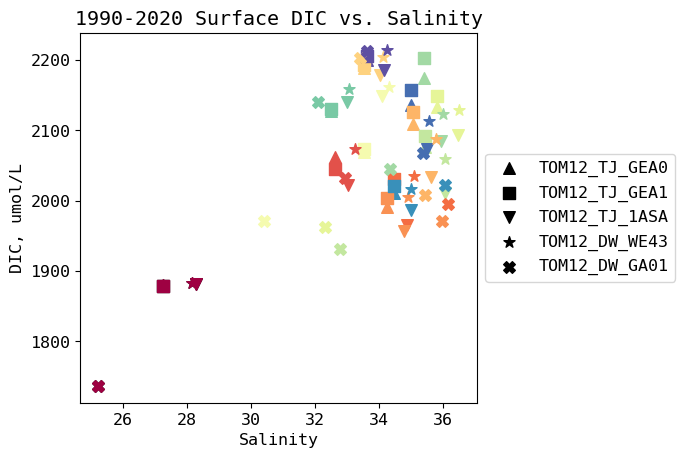

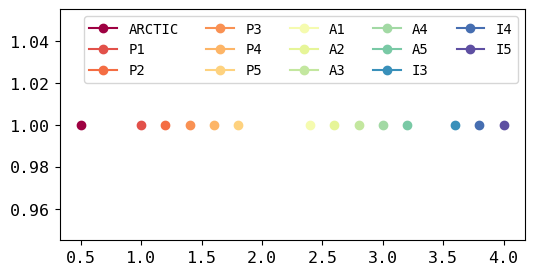

In [68]:
marker = ['^','s','v','*','X']
s=70

fig = plt.figure()
ax = plt.subplot(111)

# #GLODAP
# plt.scatter(tdat_fil_mean['SAL'], tdat_fil_mean['DIC'] ,marker = 'o',s=s, label = 'GLODAP',color='k', zorder=5)

# MODELS
for m, modam in enumerate(modlist):
    for i, reg in enumerate(regs):
        plt.scatter(data_total[modam]['SAL_total_mean'][i], 
                    data_total[modam]['DIC_total_mean'][i] * 1e6, s=s,
                    marker = marker[m],color=cmap(norm(regdict[reg]['number'])))
    
    plt.scatter(data_total[modam]['SAL_total_mean'][0], 
                    data_total[modam]['DIC_total_mean'][0] * 1e6, 
                    marker = marker[m],color = 'k',label = modam, s=s,zorder=-5) # for lable

plt.title(f'{yrst}-{yrend} Surface DIC vs. Salinity')
plt.xlabel('Salinity')
plt.ylabel('DIC, umol/L')

# legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# For region reference
fig = plt.figure(figsize=(30*0.2,15*0.2))
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')
norm = matplotlib.colors.Normalize(vmin=0.5, vmax=4)
for i in range(0,len(regs)):
    rgba = cmap(norm(regdict[regs[i]]['number']))
    plt.plot(regdict[regs[i]]['number'], 1, marker = 'o', color = rgba, label = regs[i])
    regdict[regs[i]]['colour'] = rgba
plt.legend(ncol = 5, fontsize = 10)

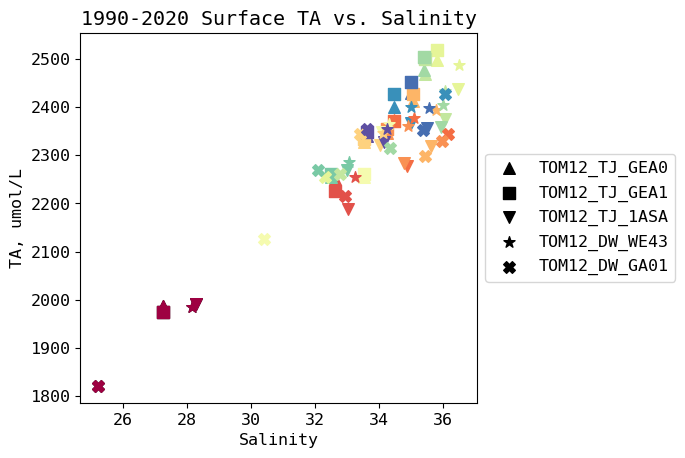

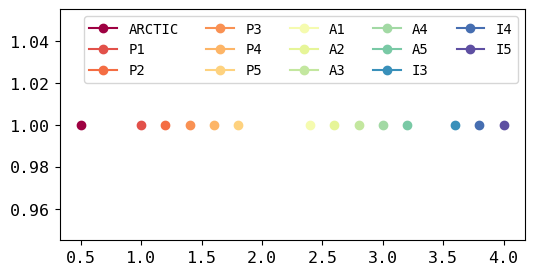

In [69]:
fig = plt.figure()
ax = plt.subplot(111)

# #GLODAP
# plt.scatter(tdat_fil_mean['SAL'], tdat_fil_mean['TA'] ,marker = 'o',s=s, label = 'GLODAP',color='k', zorder=5)

#MODELS
for m, modam in enumerate(modlist):
    for i, reg in enumerate(regs):
        plt.scatter(data_total[modam]['SAL_total_mean'][i], 
                    data_total[modam]['TA_total_mean'][i] * 1e6, s=s,
                    marker = marker[m],color=cmap(norm(regdict[reg]['number'])))
    
    plt.scatter(data_total[modam]['SAL_total_mean'][0], 
                    data_total[modam]['TA_total_mean'][0] * 1e6, 
                    marker = marker[m],color = 'k',label = modam, s=s,zorder=-5) # for lable
    

plt.title(f'{yrst}-{yrend} Surface TA vs. Salinity')

plt.xlabel('Salinity')
plt.ylabel('TA, umol/L')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# For region reference
fig = plt.figure(figsize=(30*0.2,15*0.2))
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')
norm = matplotlib.colors.Normalize(vmin=0.5, vmax=4)
for i in range(0,len(regs)):
    rgba = cmap(norm(regdict[regs[i]]['number']))
    plt.plot(regdict[regs[i]]['number'], 1, marker = 'o', color = rgba, label = regs[i])
    regdict[regs[i]]['colour'] = rgba
plt.legend(ncol = 5, fontsize = 10)

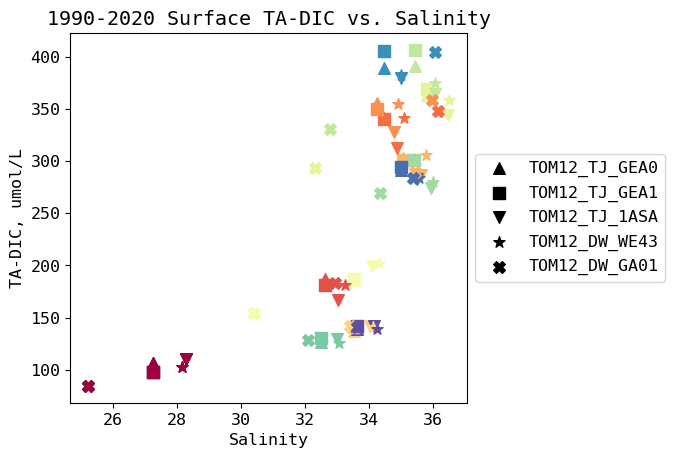

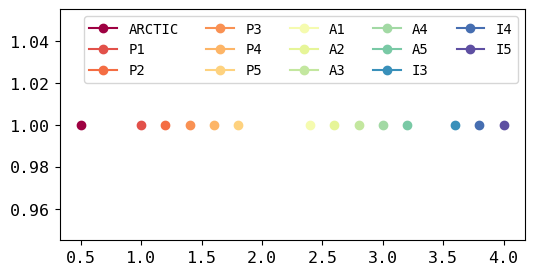

In [70]:
#TA-DIC

fig = plt.figure()
ax = plt.subplot(111)


#MODELS
for m, modam in enumerate(modlist):
    for i, reg in enumerate(regs):
        plt.scatter(data_total[modam]['SAL_total_mean'][i], 
                    (data_total[modam]['TA_total_mean'][i]-data_total[modam]['DIC_total_mean'][i]) * 1e6, s=s,
                    marker = marker[m],color=cmap(norm(regdict[reg]['number'])))
    
    plt.scatter(data_total[modam]['SAL_total_mean'][0], 
                (data_total[modam]['TA_total_mean'][0]-data_total[modam]['DIC_total_mean'][0]) * 1e6, 
                marker = marker[m],color = 'k',label = modam, s=s,zorder=-5) # for lable
    

plt.title(f'{yrst}-{yrend} Surface TA-DIC vs. Salinity')

plt.xlabel('Salinity')
plt.ylabel('TA-DIC, umol/L')


# legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# For region reference
fig = plt.figure(figsize=(30*0.2,15*0.2))
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')
norm = matplotlib.colors.Normalize(vmin=0.5, vmax=4)
for i in range(0,len(regs)):
    rgba = cmap(norm(regdict[regs[i]]['number']))
    plt.plot(regdict[regs[i]]['number'], 1, marker = 'o', color = rgba, label = regs[i])
    regdict[regs[i]]['colour'] = rgba
plt.legend(ncol = 5, fontsize = 10)